## Images

a) Load an image (cat, monkey) crop a certain region and display it

b) Load an image, find the average colour, and make it brighter or darker, then save the results and display them

In [11]:
from PIL import Image, ImageEnhance

In [20]:
cat = Image.open("cat.jpg")
monkey = Image.open("monkey.jpg")

In [ ]:
cat = Image.open("cat.jpg")
monkey = Image.open("monkey.jpg")

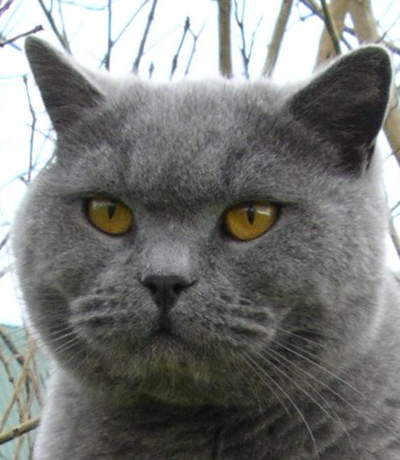

In [37]:
# Cropped image of above dimension
# (It will not change original image)
cat_cropped = cat.crop((100, 40, 500, 500))
 
display(cat_cropped)

In [42]:
#image brightness enhancer
cat_enhancer = ImageEnhance.Brightness(cat_cropped)

factor = 0.5 #darkens the image
dark_cat = cat_enhancer.enhance(factor)
dark_cat.save('darkened-cat.png')

factor = 1.5 #brightens the image
bright_cat = cat_enhancer.enhance(factor)
bright_cat.save('brightened-cat.png')

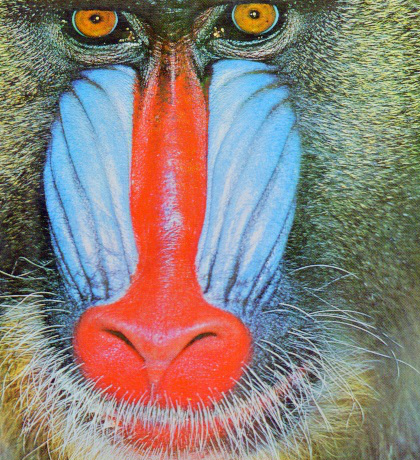

In [40]:
monkey_cropped = monkey.crop((80, 40, 500, 500))
 
display(monkey_cropped)

In [43]:
#image brightness enhancer
monkey_enhancer = ImageEnhance.Brightness(monkey_cropped)

factor = 0.5 #darkens the image
dark_monkey = monkey_enhancer.enhance(factor)
dark_monkey.save('darkened-monkey.png')

factor = 1.5 #brightens the image
dark_monkey = monkey_enhancer.enhance(factor)
dark_monkey.save('brightened-monkey.png')

## Find average color of an Image
https://towardsdatascience.com/finding-most-common-colors-in-python-47ea0767a06a

In [47]:
#Step 1 — Load Packages
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [48]:
#Step 2 — Load and show sample images
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [49]:
cat = cv.imread("cat.jpg")
cat = cv.cvtColor(cat, cv.COLOR_BGR2RGB)
monkey = cv.imread("monkey.jpg")
monkey = cv.cvtColor(monkey, cv.COLOR_BGR2RGB)

dim = (500, 300)
# resize image
cat = cv.resize(cat, dim, interpolation = cv.INTER_AREA)
monkey = cv.resize(monkey, dim, interpolation = cv.INTER_AREA)

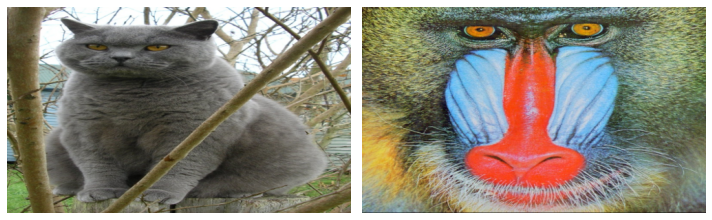

In [50]:
show_img_compar(cat, monkey)

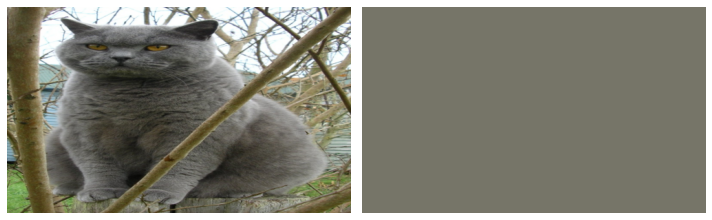

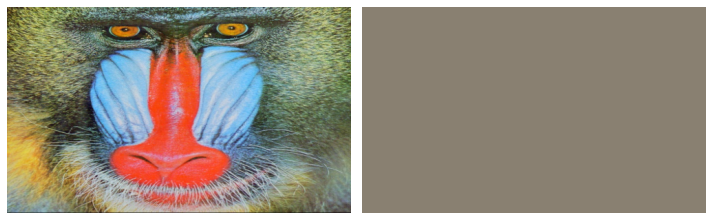

In [51]:
cat_temp = cat.copy()
cat_temp[:,:,0], cat_temp[:,:,1], cat_temp[:,:,2] = np.average(cat, axis=(0,1))

monkey_temp = monkey.copy()
monkey_temp[:,:,0], monkey_temp[:,:,1], monkey_temp[:,:,2] = np.average(monkey, axis=(0,1))

show_img_compar(cat, cat_temp)
show_img_compar(monkey, monkey_temp)

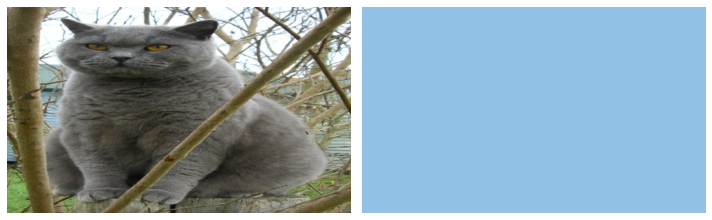

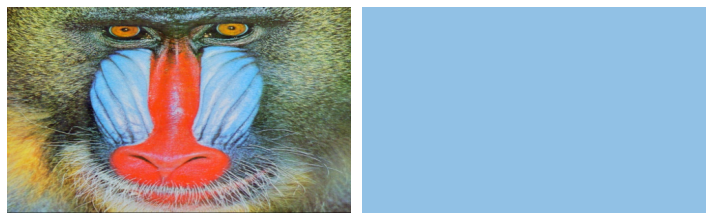

In [52]:
# Method 2 — Highest Pixel Frequency
cat_temp = cat.copy()
unique, counts = np.unique(cat_temp.reshape(-1, 3), axis=0, return_counts=True)
cat_temp[:,:,0], cat_temp[:,:,1], cat_temp[:,:,2] = unique[np.argmax(counts)]

monkey_temp = monkey.copy()
unique, counts = np.unique(monkey_temp.reshape(-1, 3), axis=0, return_counts=True)
monkey_temp[:,:,0], monkey_temp[:,:,1], monkey_temp[:,:,2] = unique[np.argmax(counts)]

show_img_compar(cat, monkey_temp)
show_img_compar(monkey, monkey_temp)

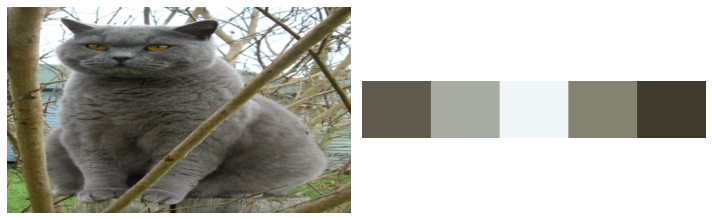

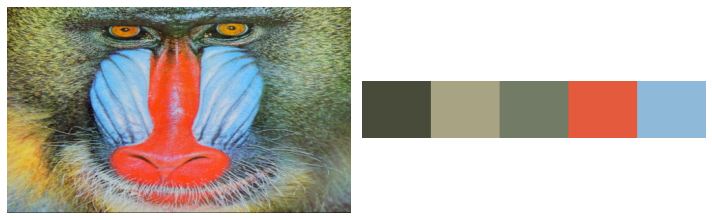

In [53]:
# Method 3 — Using K-Means clustering

from sklearn.cluster import KMeans
clt = KMeans(n_clusters=5)

def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

  
clt_1 = clt.fit(cat.reshape(-1, 3))
show_img_compar(cat, palette(clt_1))

clt_2 = clt.fit(monkey.reshape(-1, 3))
show_img_compar(monkey, palette(clt_2))